In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load one month (April 2014) as sample
df = pd.read_csv("uber-raw-data-apr14.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (564516, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [2]:
#Feature Engineering
# Convert Date/Time to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract features
df['hour'] = df['Date/Time'].dt.hour
df['weekday'] = df['Date/Time'].dt.weekday  # 0=Mon, 6=Sun
df['month'] = df['Date/Time'].dt.month

# Keep only useful features
df = df[['Date/Time', 'Lat', 'Lon', 'hour', 'weekday', 'month']]
df.head()

,Date/Time,Lat,Lon,hour,weekday,month
0,2014-04-01 00:11:00,40.7690,-73.9549,0,1,4
1,2014-04-01 00:17:00,40.7267,-74.0345,0,1,4
2,2014-04-01 00:21:00,40.7316,-73.9873,0,1,4
3,2014-04-01 00:28:00,40.7588,-73.9776,0,1,4
4,2014-04-01 00:33:00,40.7594,-73.9722,0,1,4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


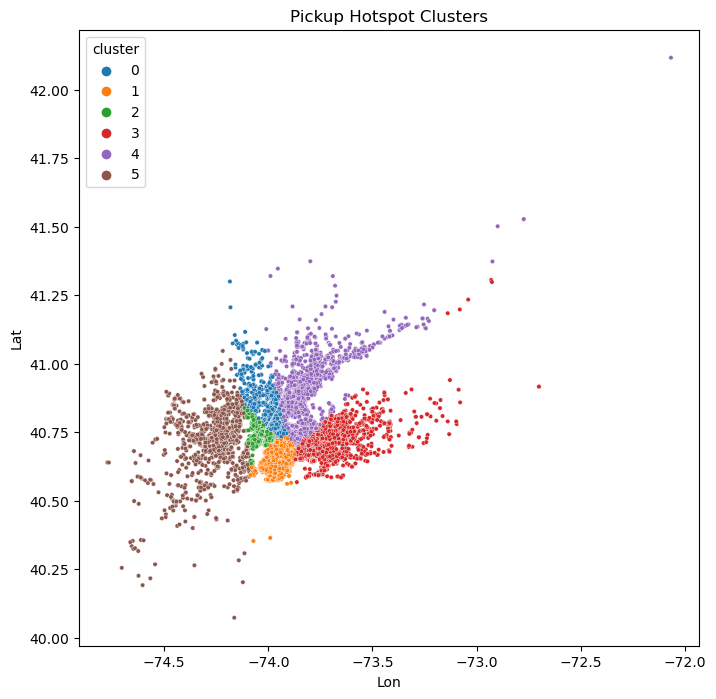

In [3]:
#clustering pickup Hotspot
# Cluster pickup locations into 6 zones
coords = df[['Lat', 'Lon']]
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

# Visualize clusters
plt.figure(figsize=(8,8))
sns.scatterplot(x='Lon', y='Lat', hue='cluster', data=df, palette="tab10", s=10)
plt.title("Pickup Hotspot Clusters")
plt.show()

In [4]:
#Build Content-Based Recommender
def recommend_pickup(hour, weekday):
    # Filter trips at given time & weekday
    subset = df[(df['hour'] == hour) & (df['weekday'] == weekday)]
    
    if subset.empty:
        return f"No data available for {hour}:00 on weekday {weekday}"
    
    # Recommend top 3 clusters
    popular_clusters = subset['cluster'].value_counts().head(3).index.tolist()
    return f"At {hour}:00 on weekday {weekday}, recommended pickup zones are clusters {popular_clusters}"

# Example: Recommend for Monday 9 AM
print(recommend_pickup(9, 0))

At 9:00 on weekday 0, recommended pickup zones are clusters [0, 2, 1]


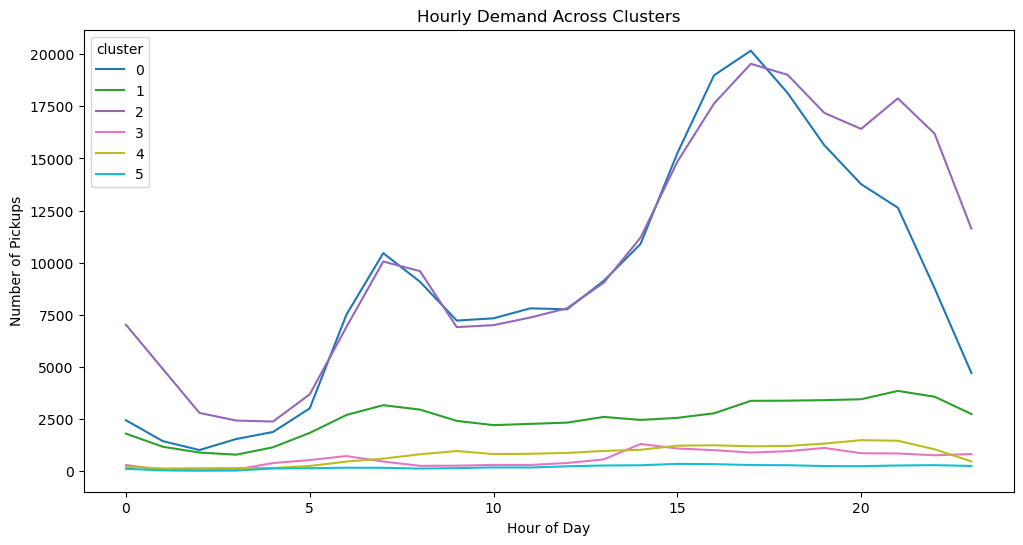

In [5]:
#Visualize Demand by Time & Cluster
# Average pickups per cluster by hour
cluster_hour = df.groupby(['hour','cluster']).size().unstack(fill_value=0)

cluster_hour.plot(kind='line', figsize=(12,6), colormap="tab10")
plt.title("Hourly Demand Across Clusters")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.show()

In [6]:
#Extend to All Months
import glob

# Load all Uber CSVs
all_files = glob.glob("uber-raw-data-*.csv")
df_list = [pd.read_csv(file) for file in all_files]
df_all = pd.concat(df_list, ignore_index=True)

print("Combined dataset shape:", df_all.shape)

Combined dataset shape: (564516, 4)
